# Introduzione a TensorFlow

**TensorFlow** (TF), rilasciato da Google in open source nel 2015, è un framework ad alto livello per lo sviluppo di applicazioni di machine learning, con particolare riguardo verso il [Deep Learning](https://www.nature.com/nature/journal/v521/n7553/full/nature14539.html). 

Come vedremo nei tutorial più avanti, TF permette di costruire (ed allenare) modelli estremamente elaborati, relegando alla macchina alcuni dei compiti più complessi, come il calcolo dei gradienti e l'esecuzione su GPU. In questo tutorial, ci limiteremo ad esplorare l'idea di base di TF, i **grafi computazionali**, con un semplice esempio di regressione lineare. Prima di questo, iniziamo introducendo tutti gli elementi di base che compongono tali grafi computazionali.

## Un primo grafo computazionale

Iniziamo ovviamente importando TF; se non l'avete ancora fatto, installate l'ultima versione della libreria (al momento della scrittura di questo tutorial, la 1.1), seguendo una delle guide ufficiali:
https://www.tensorflow.org/install/

In [1]:
import tensorflow as tf

### Tensori e costanti

Un grafo computazionale definisce una particolare sequenza di operazioni, applicate ad uno o più **tensori**. Per gli scopi di TF, un tensore è semplicemente un insieme di elementi (tipicamente numeri), ordinati su uno o più dimensioni, con alcune operazioni di base a loro associati.

In 2 dimensioni, ad esempio, un tensore non è altro che la familiare **matrice** dell'algebra lineare: 

$$
A = \begin{bmatrix}
1 & 3 \\
-4 & 5
\end{bmatrix}
$$

Cominciamo quindi definendo una matrice di esempio:

In [2]:
A = tf.constant([[1.0, 3.0], [-4.0, 5.0]])

L'operazione restituisce un oggetto di tipo <code>Tensor</code>, uno degli oggetti di base di TF:

In [3]:
print(A)

Tensor("Const:0", shape=(2, 2), dtype=float32)


Come si può vedere, un tensore è rappresentato da una dimensione (in questo caso, 2x2), e dal tipo dei suoi elementi. L'operazione di prima crea un nodo **costante**, il cui valore è preassegnato e non può essere mai modificato. Possiamo imporre un tipo diverso da quello predefinito passandolo come secondo parametro della funzione:

In [4]:
B = tf.constant([[-0.3, 2], [6, 1/2]], tf.float64)
print(B)

Tensor("Const_1:0", shape=(2, 2), dtype=float64)


### Operazioni su tensori

Un grafo computazionale prende in input uno o più tensori, ed esegue su di essi una serie di **operazioni**, il cui ordine è definito da un grafo aciclico. Per cominciare, consideriamo una semplice operazione di somma dei nostri due tensori:

In [5]:
C = tf.add(A, tf.cast(B, tf.float32))

Si noti la necessità di convertire B ad una precisione inferiore, per renderlo compatibile con A. Per visualizzare il grafo, installiamo il package [tfgraphviz](https://github.com/akimach/tfgraphviz/blob/master/examples/jupyter_sample.ipynb) da console di comando:

<code>$ pip install tfgraphviz
</code>

Possiamo ora visualizzare il grafo con una semplice istruzione:

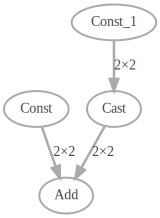

In [9]:
import tfgraphviz as tfg
tfg.board(tf.get_default_graph())

In linea generale, *visualizzare* quello che succede all'interno di TF, il quale lavora su oggetti inerentemente simbolici, è un argomento essenziale, per cui Google ha rilasciato numerosi strumenti, a partire dalla **TensorBoard** fino al debugger ufficiale di TF. Torneremo ripetutamente su questi temi più avanti.

### Input dinamici e variabili

Definire grafi statici è, ovviamente, di interesse limitato. Dopo costanti ed operazioni, il terzo elemento essenziale di un grafo computazionale è un **placeholder**, ovvero un nodo il cui valore non viene assegnato, se non quando il grafo viene effettivamente eseguito.

Riscriviamo il nostro esempio di prima con due variabili; per comodità di visualizzazione, possiamo assegnare a ciascun nodo del grafo un nome:

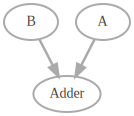

In [14]:
tf.reset_default_graph()
A = tf.placeholder(tf.float32, name='A')
B = tf.placeholder(tf.float32, name='B')
C = tf.add(A, B, name='Adder')
tfg.board(tf.get_default_graph())

Si noti come è necessario resettare il grafo, in modo da rimuovere le operazioni definite in precedenza. In modo più generale, potremmo definire in maniera pragmatica oggetti di tipo <code>Graph</code> su cui aggiungere operazioni, al posto di lavorare sul grafo di default; vedremo un esempio di questo più avanti.

### Eseguiamo il grafo

Una volta definito l'intero grafo computazionale, possiamo eseguire il grafo. Un grafo viene eseguito all'interno di un oggetto che si occupa (tra le altre cose) della sua compilazione e di gestire tutte le risorse del sistema, una **sessione**:

In [16]:
sess = tf.Session()
sess.run([C], feed_dict={A: [1], B: [3]})

[array([ 4.], dtype=float32)]

Come si può vedere, eseguire un grafo equivale a richiedere il valore di uno o più nodi (in questo caso, C), fornendo un valore esplicito per tutti i placeholder del grafo. Più avanti vedremo come TF mette a disposizione un oggetto più complesso, una <code>InteractiveSession</code>, per rendere più flessibile la fase di definizione del grafo.